In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from zipfile import ZipFile
file_name ="/content/gdrive/MyDrive/Training_Set.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
dataset=r'/content/Training_Set'
imagePaths=list(paths.list_images(dataset))

In [ ]:
print(len(imagePaths))

200000


In [ ]:
import tensorflow as tf 
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset+"/train",
  label_mode='int',
  seed=123,
  image_size=(224, 224),
  batch_size=32)
test_ds = tf.keras.utils.image_dataset_from_directory(
  dataset+"/test",
  label_mode='int',
  seed=123,
  image_size=(224, 224),
  batch_size=32)
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset+"/val",
  label_mode='int',
  seed=123,
  image_size=(224, 224),
  batch_size=32)

Found 140000 files belonging to 2 classes.
Found 40000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [ ]:
print(train_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
for data_batch, labels_batch in train_ds:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break



data batch shape: (32, 224, 224, 3)
labels batch shape: (32,)


In [ ]:
baseModel=MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)),classes=2,alpha=1.0)


In [ ]:
print(baseModel.summary())

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(1,activation='sigmoid')(headModel)


In [ ]:
model=Model(inputs=baseModel.input,outputs=headModel)


In [ ]:
for layer in baseModel.layers:
    layer.trainable=False

In [ ]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
learning_rate=0.001
Epochs=10
BS=32

In [ ]:
opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),optimizer=opt,metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
H = model.fit(
train_ds,
epochs=30,
validation_data=val_ds)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


4375/4375 [==============================] - 305s 67ms/step - loss: 0.4244 - accuracy: 0.7958 - val_loss: 0.1745 - val_accuracy: 0.9362
Epoch 2/30
4375/4375 [==============================] - 265s 61ms/step - loss: 0.3910 - accuracy: 0.8147 - val_loss: 0.1752 - val_accuracy: 0.9301
Epoch 3/30
4375/4375 [==============================] - 264s 60ms/step - loss: 0.3803 - accuracy: 0.8211 - val_loss: 0.2009 - val_accuracy: 0.9101
Epoch 4/30
4375/4375 [==============================] - 275s 63ms/step - loss: 0.3725 - accuracy: 0.8237 - val_loss: 0.2007 - val_accuracy: 0.9134
Epoch 5/30
4375/4375 [==============================] - 267s 61ms/step - loss: 0.3674 - accuracy: 0.8270 - val_loss: 0.1923 - val_accuracy: 0.9172
Epoch 6/30
4375/4375 [==============================] - 269s 61ms/step - loss: 0.3633 - accuracy: 0.8288 - val_loss: 0.1887 - val_accuracy: 0.9184
Epoch 7/30
4375/4375 [==============================] - 250s 57ms/step - loss: 0.3595 - accuracy: 0.8323 - val_loss: 0.1874 - val

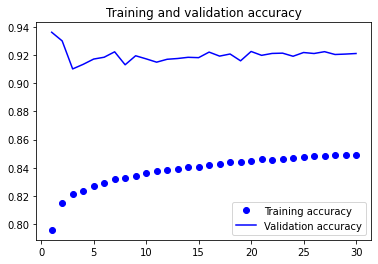

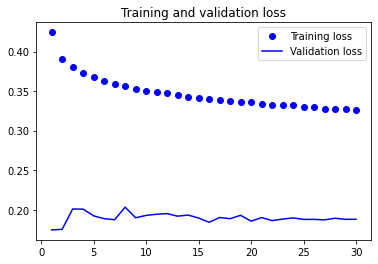

In [ ]:
accuracy = H.history["accuracy"]
val_accuracy = H.history["val_accuracy"]
loss = H.history["loss"]
val_loss = H.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
print("[INFO] saving mask detector model...")
model.save('person-no-person.h5')

[INFO] saving mask detector model...


In [ ]:
from google.colab import files
files.download("person-no-person.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from keras.models import load_model
test_model = load_model("person-no-person.h5")
test_loss, test_acc = test_model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.3f}")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1250/1250 [==============================] - 73s 57ms/step - loss: 0.7966 - accuracy: 0.8462
Test accuracy: 0.846
